# Gradient Descent    
  
Gradient descent is a widely used optimization algorithm in machine learning and deep learning, particularly for finding the optimal parameters of a model to minimize the error or loss function.  
  
The goal of gradient descent is to minimize a cost function (or loss function) by iteratively adjusting the model parameters in the direction of steepest descent of the cost function. In other words, it aims to find the lowest point (or minimum) of the cost function by taking small steps in the opposite direction of the gradient.   
   
![Alt text](gradient%20descent%20.png)

The basic steps of gradient descent are as follows:   
  
1. Initialize the model parameters with random values.
2. Calculate the gradient of the cost function with respect to each parameter.
3. Update the parameters by subtracting the gradient times a learning rate from the current parameter values.
4. Repeat steps 2 and 3 until the cost function converges or a stopping criterion is met.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Use simple function to get to know with gradient descent.

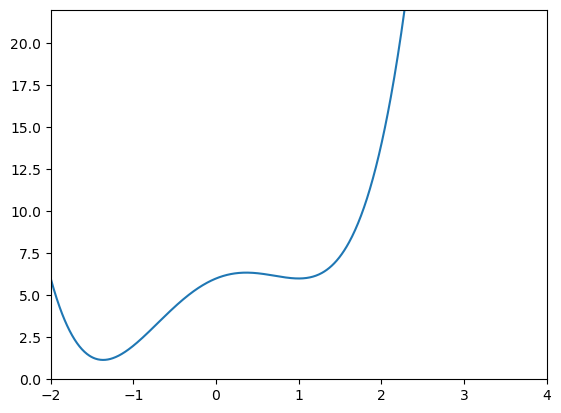

In [8]:
f = lambda x: x**4-3*x**2+2*x+6
x = np.linspace(-2,4,1000)
plt.plot(x,f(x))
plt.xlim([-2,4])
plt.ylim([0,22])
plt.show()

In [9]:
x_old = 0
x_new = 4 
n_k = 0.05
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

def f_prime(x):
    return 3*x**2-6*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 2.0001918587194885
Number of steps: 24


Text(0.5, 1.0, 'Gradient descent')

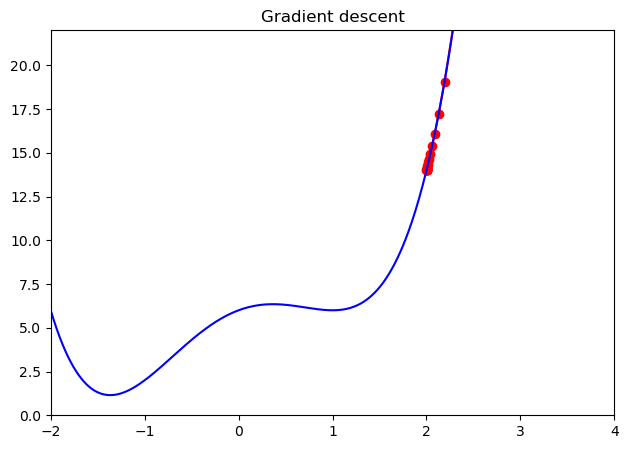

In [11]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,4])
plt.ylim([0,22])
plt.title("Gradient descent")

We look at $$f(x) = x^3-3y^2+6$$

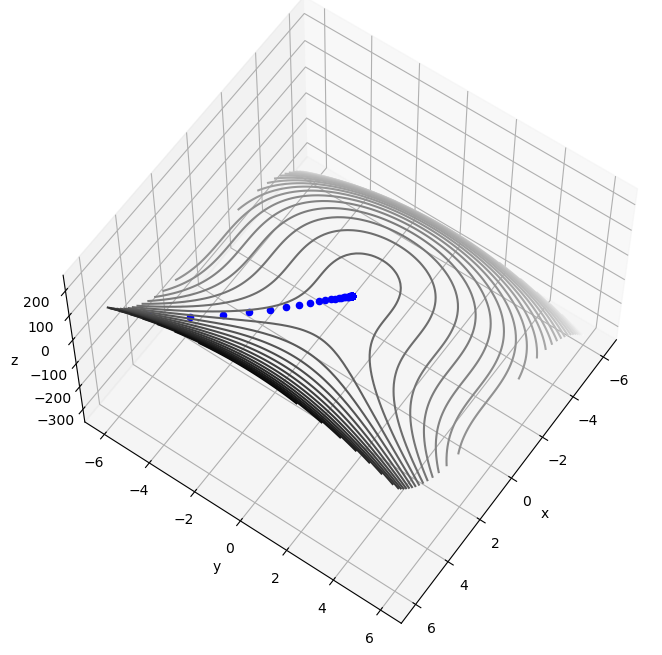

In [17]:
def f(w_0, w_1):
    return w_0**3-3*w_1**2+6

def df(w):
    grad = [2*w[0], 2*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()